# Examen Wilson Calle

In [1]:
import pandas as pd
import numpy as np
import csv
import requests
import io
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

In [2]:
url = 'D:\Simulacion\datosecu.csv'
df = pd.read_csv(url)
print(df)

    ndia  nrecup
0      1       0
1      2       0
2      3       0
3      4       0
4      5       0
..   ...     ...
74    75     103
75    76       0
76    77       0
77    78       0
78    79      24

[79 rows x 2 columns]


In [3]:
x = list(df.iloc [:, 0]) # Numero de Dia
y = list(df.iloc [:, 1]) # Numero de recuperados
for i in range(len(y)):
    if i > 0:
        y[i]=y[i]+y[i-1]
        
print(y)
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 54, 58, 63, 68, 71, 100, 100, 140, 140, 339, 368, 411, 501, 597, 696, 780, 838, 922, 1008, 1061, 1150, 1207, 1262, 1328, 1366, 1557, 1643, 1720, 1806, 1913, 2132, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3536, 3536, 3536, 3536, 3560]
Coefficients: 
 [51.78181597]
Independent term: 
 -1047.196689386563


In [4]:
y_prediccion = regr.predict([[7]])
print('En 7 días: ',abs(int(y_prediccion)))

En 7 días:  684


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85]


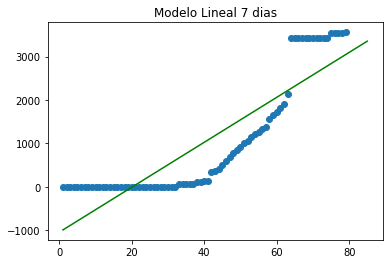

In [5]:
plt.scatter(x, y)
x_real = np.array(range(1, len(x)+7))
print(x_real)
plt.title("Modelo Lineal 7 dias")
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

In [6]:
y_prediccion = regr.predict([[30]])
print('En un mes: ',abs(int(y_prediccion)))

En un mes:  506


[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108]


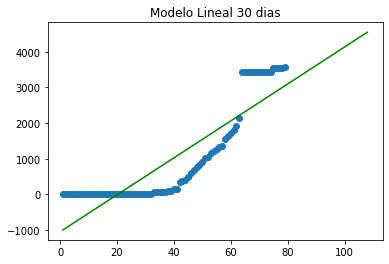

In [7]:
plt.scatter(x, y)
x_real = np.array(range(1, len(x)+30))
print(x_real)
plt.title("Modelo Lineal 30 dias")
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

7 dias:  1368


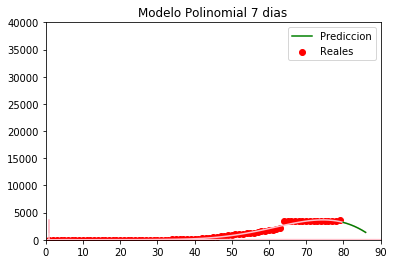

In [8]:
pf = PolynomialFeatures(degree = 7)
X = pf.fit_transform(np.array(x).reshape(-1, 1))

regresion_lineal = LinearRegression()

regresion_lineal.fit(X, y) 

 

pred_x = list(range(0,max(x)+8))
fil = pf.fit_transform(np.array(pred_x).reshape(-1, 1))

pol = regresion_lineal.predict(fil)
print('7 dias: ',int(pol[max(x)+7]))
solo = [pol[max(x)+1], pol[max(x)+2] ,pol[max(x)+3] ,pol[max(x)+4], pol[max(x)+5],pol[max(x)+6],pol[max(x)+7] ]
xpredict = range(max(x)+1,max(x)+8)
plt.plot(fil, pol, color='pink')
plt.scatter(x,y,label="Reales",color="red")
plt.plot(xpredict,solo, color='green',label="Prediccion")
plt.ylim((0,40000))
plt.title('Modelo Polinomial 7 dias')
plt.xlim(0,90) 
plt.legend()
plt.show()

30 dias:  11766


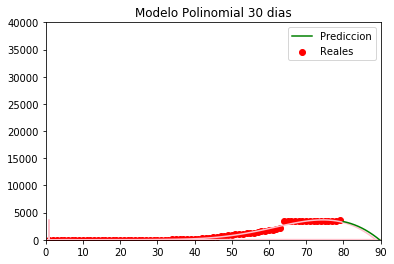

In [9]:
pf = PolynomialFeatures(degree = 7)
X = pf.fit_transform(np.array(x).reshape(-1, 1))

regresion_lineal = LinearRegression()

regresion_lineal.fit(X, y) 

 

pred_xt = list(range(0,max(x)+31))

filt = pf.fit_transform(np.array(pred_xt).reshape(-1, 1))
only=[]
fpredictpolt = regresion_lineal.predict(filt)
print('30 dias: ',abs(int(fpredictpolt[max(x)+30])))
for i in range(30):
    only.append(fpredictpolt[max(x)+i])
xpredictt = range(max(x)+1,max(x)+31)
plt.plot(filt, fpredictpolt, color='pink')
plt.scatter(x,y,label="Reales",color="red")
plt.plot(xpredictt,only, color='green',label="Prediccion")
plt.ylim((0,40000))
plt.title('Modelo Polinomial 30 dias')
plt.xlim(0,90) 
plt.legend()
plt.show()

In [10]:
filtro = df['nrecup'][20:] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print('Mediana: ',mediana)
print('Media: ',media)

Mediana:  5.0
Media:  60.33898305084746


In [11]:
xt = list(df.iloc [:, 0]) # Numero de Dia
yt = list(df.iloc [:, 1]) # Numero de recuperados
prediccion_siguiente = int(yt[-1]+7 + mediana)
prediccion_siguientet = int(yt[-1]+30 + mediana)

7 dias:  59


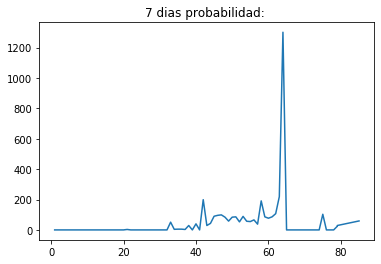

In [12]:
# 7 dias.
for i in range(xt[-1], xt[-1]+7):
    xt.append(i)
    yt.append(int(yt[-1] + mediana))
plt.plot(xt, yt)
print('7 dias: ', yt[-1])
plt.title('7 dias probabilidad: ')
plt.show()

7 dias:  209


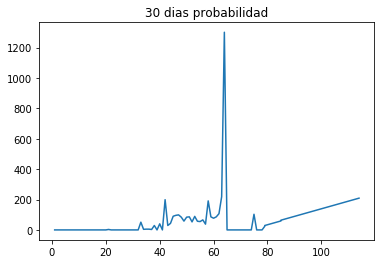

In [13]:
# 30 dias.
for i in range(xt[-1], xt[-1]+30):
    xt.append(i)
    yt.append(int(yt[-1] + mediana))
plt.plot(xt, yt)
print('7 dias: ', yt[-1])
plt.title('30 dias probabilidad')
plt.show()

# •	Cual tiene una mejor prediccion.
El modelo Polinimial a mi parecer tiene una mejor predicion ya que por sus curvas se acomoda mejor a la realidad y nos devuelve algo mas excato
# •	Ventajas y desventajas de los modelos.
1. El modelo lineal nos devuelve de manera rapia una prediccion pero solo sirve con valores escalables mas no con pices o descensos
2. El modelo Polinomial nos devuleve valores mas exactos a la realidad pero dependiendo el grado puede que sea mejor o pero la prediccion
3. El modelo probabilistico saxca valores un poco mas racionales con respecto a los datos pero si no se cuenta con todos los valores no lo podemos utilizar.

# •	Comparacion entre los modelos aplicados.

Como comparacion entre los modelos utilizados podemos notar que el modelo polinomial es el mque mejor se apega a la realidad a comparacion con los demas pero el lineal es mas facil aplicar

In [14]:
import random
import simpy
numrecup=11766 #modelo polinomial 30 dias
dias_rep=7
dias_tele=14
dias_vuelt=7
simulacion_dias=220
taza=5000

trabajo={}
presencial={}
desempleo={}
alimentos={}
ocio={}
retail={}
viajes={}
hoteles={}

class Reince(object):
    def __init__(self, env,numper,tiptr):
        self.env = env
        self.tiptr=tiptr
        self.numper = numper
    def ingresa_persona(self, persona):
        yield self.env.timeout(random.randint(dias_rep-5, dias_rep))
        print("La persona sale del reposo obligatorio: ", persona, " al tiempo: ", self.env.now)    
        
    def evaluacion(self, pasa):
        if pasa > 0 and pasa <=70:
            presencial[env.now] = presencial[env.now] + 1 if env.now in presencial else  1
        else:
            yield self.env.timeout(random.randint(dias_vuelt-4, dias_vuelt))
            
            pasamos=random.randint(1,100)
            evaluacion(pasamos)
        
def tiene_empleo(env, reince, persona):
    arrive = env.now
    tiene=random.randint(1,100)
    if tiene > 0 and tiene <=30:
        trabajo[env.now] = trabajo[env.now] + 1 if env.now in trabajo else  1
        if reince.tiptr == 'Alimentos':
            alimentos[env.now] = alimentos[env.now] + 1 if env.now in alimentos else  1
        elif reince.tiptr == 'Retail':
            retail[env.now] = retail[env.now] + 1 if env.now in retail else  1
        elif reince.tiptr == 'Ocio':
            ocio[env.now] = ocio[env.now] + 1 if env.now in ocio else  1
        elif reince.tiptr == 'Viajes':
            viajes[env.now] = viajes[env.now] + 1 if env.now in viajes else  1
        elif reince.tiptr == 'Hoteles':
            hoteles[env.now] = hoteles[env.now] + 1 if env.now in hoteles else  1
        yield env.timeout(random.randint(dias_tele-9, dias_tele))
        #print("La persona con teletrabajo: ", persona, " al tiempo: ", env.now) 
        evaluar = True
        pasa=random.randint(1,100)
        while evaluar:
            pasa=random.randint(1,100)
            evaluar = (pasa>0 and pasa <=70)
        presencial[env.now] = presencial[env.now] + 1 if env.now in presencial else  1
    else:
        desempleo[env.now] = desempleo[env.now] + 1 if env.now in desempleo else  1
                
def ejecutar(env, taza, numrecup):
    trabaA = Reince(env, numrecup, "Alimentos")
    trabaB = Reince(env, numrecup, "Retail")
    trabaC = Reince(env, numrecup, "Ocio")
    trabaD = Reince(env, numrecup, "Viajes")
    trabaE = Reince(env, numrecup, "Hoteles")
    for i in range(numrecup):
        asignar_trabajo(env, trabaA, trabaB, trabaC, trabaD, trabaE, i)
    persona = numrecup
    while True:
        yield env.timeout(1)
        for i in range(taza):
            persona += 1
            asignar_trabajo(env, trabaA, trabaB, trabaC, trabaD, trabaE, persona)
    
def asignar_trabajo(env,trabA,trabB,trabC,trabD,trabE,persona):
    puesto=random.randint(1,5)
    if puesto == 1:
        env.process(tiene_empleo(env, trabA, persona))
    elif puesto == 2:
        env.process(tiene_empleo(env, trabB, persona))
    elif puesto == 3:
        env.process(tiene_empleo(env, trabC, persona))
    elif puesto == 4:
        env.process(tiene_empleo(env, trabD, persona))
    elif puesto == 5:
        env.process(tiene_empleo(env, trabE, persona))
    
        
print("Simulacion COVID 19 en el Ecuador")
env=simpy.Environment()
print(env," ", taza, " ", numrecup)
env.process(ejecutar(env,taza,numrecup))
env.run(until=simulacion_dias)

print("Personas con Empleo: ")
print(trabajo)
print("Personas con Empleo Presencial: ")
print(presencial)
print("Personas Desempleadas: ")
print(desempleo)
print("Personas con Empleo en Alimentación: ")
print(alimentos)
print("Personas con Empleo en Retail: ")
print(retail)
print("Personas con Empleo en Ocio: ")
print(ocio)
print("Personas con Empleo en Viajes: ")
print(viajes)
print("Personas con Empleo en Hoteles: ")
print(hoteles)


Simulacion COVID 19 en el Ecuador
<simpy.core.Environment object at 0x0000014BE3528688>   5000   11766
Personas con Empleo: 
{0: 3486, 1: 1485, 2: 1477, 3: 1494, 4: 1543, 5: 1487, 6: 1510, 7: 1483, 8: 1439, 9: 1494, 10: 1532, 11: 1498, 12: 1504, 13: 1579, 14: 1503, 15: 1489, 16: 1465, 17: 1492, 18: 1411, 19: 1543, 20: 1520, 21: 1426, 22: 1485, 23: 1502, 24: 1531, 25: 1477, 26: 1494, 27: 1522, 28: 1476, 29: 1517, 30: 1533, 31: 1502, 32: 1434, 33: 1494, 34: 1513, 35: 1502, 36: 1490, 37: 1538, 38: 1561, 39: 1506, 40: 1533, 41: 1486, 42: 1493, 43: 1477, 44: 1480, 45: 1492, 46: 1535, 47: 1506, 48: 1485, 49: 1523, 50: 1428, 51: 1498, 52: 1463, 53: 1532, 54: 1535, 55: 1528, 56: 1522, 57: 1512, 58: 1507, 59: 1473, 60: 1532, 61: 1462, 62: 1460, 63: 1524, 64: 1507, 65: 1544, 66: 1450, 67: 1504, 68: 1503, 69: 1495, 70: 1513, 71: 1527, 72: 1465, 73: 1537, 74: 1506, 75: 1493, 76: 1438, 77: 1557, 78: 1544, 79: 1466, 80: 1491, 81: 1476, 82: 1455, 83: 1515, 84: 1519, 85: 1500, 86: 1513, 87: 1535, 88: 

# Observaciones para el gráfico

Dado que la taza de crecimiento me salio de 5 puesto que existian valores de crecimiento de dias que eran 0 y otros dias que eran muy altos, es por esto que se procedió a ingresar un valor 5000

Otra consideración es que dado que el primer dia el pico de empleo o desempleo era muy alto se procedio a graficar sin tomar en cuenta ese dia si no el siguiente para apreciar mejor la gráfica, pero los valores se los puede constatar en las impresiones realizadas en el punto anterior.

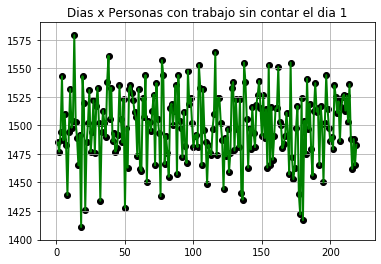

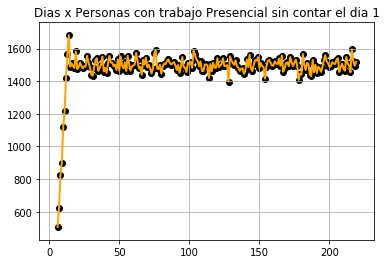

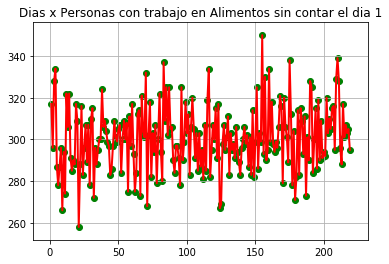

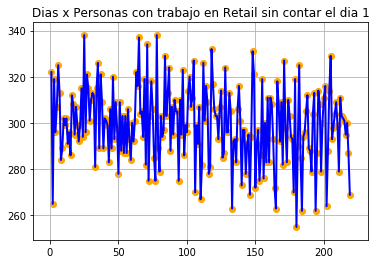

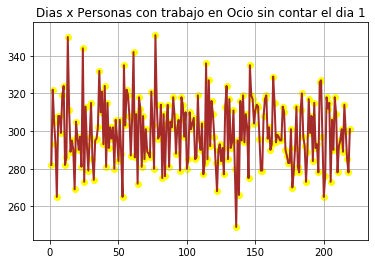

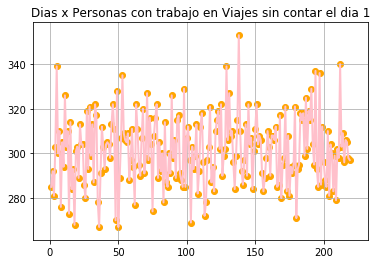

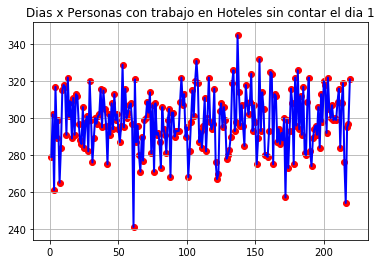

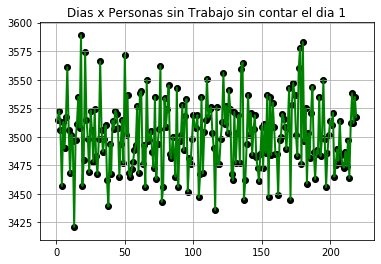

In [15]:
datos=sorted(trabajo.items()) 
x, y =zip(*datos) 
plt.plot(x[1:],y[1:],linewidth=2,color='green') 
plt.scatter(x[1:],y[1:],color='black') 
plt.title("Dias x Personas con trabajo sin contar el dia 1")
plt.grid(True) 
plt.show()

datos=sorted(presencial.items()) 
x, y =zip(*datos) 
plt.plot(x[1:],y[1:],linewidth=2,color='orange') 
plt.scatter(x[1:],y[1:],color='black') 
plt.title("Dias x Personas con trabajo Presencial sin contar el dia 1")
plt.grid(True) 
plt.show()

datos=sorted(alimentos.items()) 
x, y =zip(*datos) 
plt.plot(x[1:],y[1:],linewidth=2,color='red') 
plt.scatter(x[1:],y[1:],color='green') 
plt.title("Dias x Personas con trabajo en Alimentos sin contar el dia 1")
plt.grid(True) 
plt.show()

datos=sorted(retail.items()) 
x, y =zip(*datos) 
plt.plot(x[1:],y[1:],linewidth=2,color='blue') 
plt.scatter(x[1:],y[1:],color='orange') 
plt.title("Dias x Personas con trabajo en Retail sin contar el dia 1")
plt.grid(True) 
plt.show()

datos=sorted(ocio.items()) 
x, y =zip(*datos) 
plt.plot(x[1:],y[1:],linewidth=2,color='brown') 
plt.scatter(x[1:],y[1:],color='yellow') 
plt.title("Dias x Personas con trabajo en Ocio sin contar el dia 1")
plt.grid(True) 
plt.show()

datos=sorted(viajes.items()) 
x, y =zip(*datos) 
plt.plot(x[1:],y[1:],linewidth=2,color='pink') 
plt.scatter(x[1:],y[1:],color='orange') 
plt.title("Dias x Personas con trabajo en Viajes sin contar el dia 1")
plt.grid(True) 
plt.show()

datos=sorted(hoteles.items()) 
x, y =zip(*datos) 
plt.plot(x[1:],y[1:],linewidth=2,color='blue') 
plt.scatter(x[1:],y[1:],color='red') 
plt.title("Dias x Personas con trabajo en Hoteles sin contar el dia 1")
plt.grid(True) 
plt.show()


datos=sorted(desempleo.items()) 
x, y =zip(*datos) 
plt.plot(x[1:],y[1:],linewidth=2,color='green') 
plt.scatter(x[1:],y[1:],color='black') 
plt.title("Dias x Personas sin Trabajo sin contar el dia 1")
plt.grid(True) 
plt.show()

[331736]


Text(0, 0.5, 'Totales de Personas')

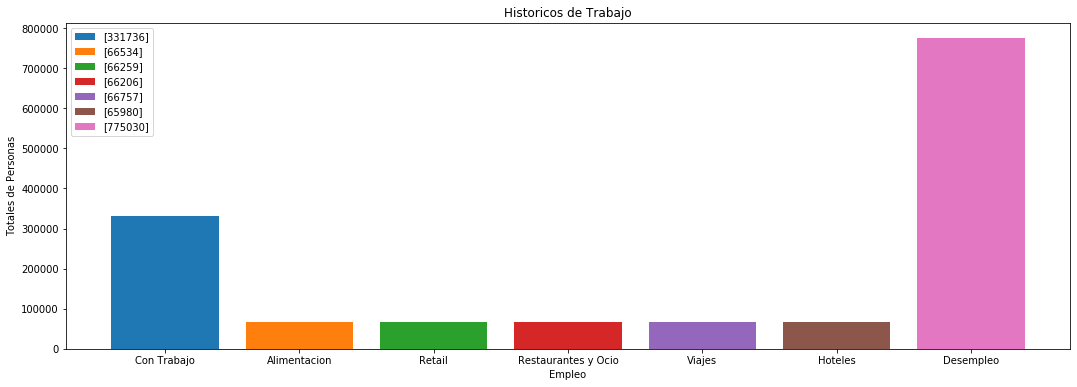

In [17]:
nomtrabajo=['Con Trabajo','Alimentacion','Retail','Restaurantes y Ocio','Viajes','Hoteles','Desempleo']
totr=[sum(trabajo.values())]
totali=[sum(alimentos.values())]
totrel=[sum(retail.values())]
totocio=[sum(ocio.values())]
totviaj=[sum(viajes.values())]
tothot=[sum(hoteles.values())]
totdes=[sum(desempleo.values())]
valoresf=[totr,totali,totrel,totocio,totviaj,tothot,totdes]
print(totr)
fig, gra = plt.subplots(figsize = (18, 6))
poss = np.arange(len(nomtrabajo))
gra.bar(0,totr, label=nomtrabajo[0])
gra.bar(1,totali, label=nomtrabajo[1])
gra.bar(2,totrel, label=nomtrabajo[2])
gra.bar(3,totocio, label=nomtrabajo[3])
gra.bar(4,totviaj, label=nomtrabajo[4])
gra.bar(5,tothot, label=nomtrabajo[5])
gra.bar(6,totdes, label=nomtrabajo[6])
gra.legend(valoresf)
plt.xticks(poss,nomtrabajo)
plt.title('Historicos de Trabajo')
plt.xlabel('Empleo')
plt.ylabel('Totales de Personas')